In [27]:
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import sunpy.map
from sunpy.cm import color_tables as ct
import sunpy.wcs as wcs
import matplotlib.dates as mdates
import matplotlib.colors as mcol
import matplotlib.patches as ptc
from matplotlib.dates import *
import math

from scipy import signal


In [28]:
AIA=fits.open("raw_data/AIA_0h_compiled.fits")
Mag=fits.open("raw_data/Mag_0h_compiled.fits")
print(AIA.info(),Mag.info())

Filename: raw_data/AIA_0h_compiled.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (512, 512, 2714)   float32   
Filename: raw_data/Mag_0h_compiled.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   (512, 512, 2714)   float32   
None None


In [3]:
AIA[0].data.shape

(2714, 512, 512)

In [29]:
eg=1007

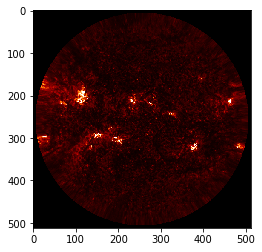

In [31]:
sdoaia304 = plt.get_cmap('sdoaia304')
[vmin,vmax]=np.multiply([0,1],500)
plt.imshow(AIA[0].data[eg,:,:],cmap=sdoaia304,vmin=vmin,vmax=vmax)
plt.imsave('AIA_image_example.jpg',AIA[0].data[eg,:,:],cmap=sdoaia304,vmin=vmin,vmax=vmax)

1662.75


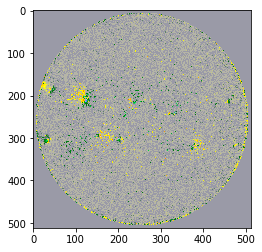

In [47]:
hmimag = plt.get_cmap('hmimag')
[vmin,vmax]=np.multiply([-1,1],3000)
plt.imshow(Mag[0].data[eg,:,:],cmap=hmimag,vmin=vmin,vmax=vmax)
plt.imsave('Mag_orig_example.jpg',Mag[0].data[eg,:,:],cmap=hmimag,vmin=vmin,vmax=vmax)
print(np.max(Mag[0].data[eg,:,:]))

In [48]:
AIA_ccd=fits.open("AIA20130402.fits")
Mag_ccd=fits.open("Mag20130402.fits")

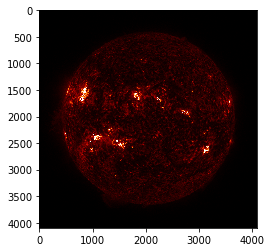

In [50]:
[vmin,vmax]=np.multiply([0,1],500)
plt.imshow(AIA_ccd[0].data,cmap=sdoaia304,vmin=vmin,vmax=vmax)
plt.imsave('AIA_ccd_image_example.jpg',AIA_ccd[0].data,cmap=sdoaia304,vmin=vmin,vmax=vmax)

1662.75


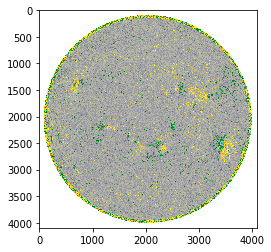

In [51]:
[vmin,vmax]=np.multiply([-1,1],3000)
plt.imshow(Mag_ccd[0].data,cmap=hmimag,vmin=vmin,vmax=vmax)
plt.imsave('Mag_ccd_image_example.jpg',Mag_ccd[0].data,cmap=hmimag,vmin=vmin,vmax=vmax)
print(np.max(Mag[0].data[eg,:,:]))

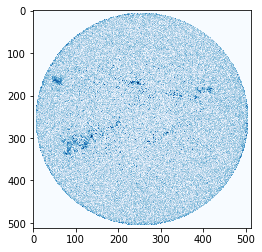

In [7]:
[vmin,vmax]=np.multiply([0,1],7)
plt.imshow(np.log(np.abs(Mag[0].data[eg,:,:])+1),cmap='Blues',vmin=vmin,vmax=vmax)

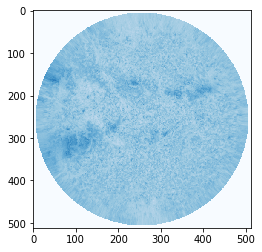

In [8]:
[vmin,vmax]=np.multiply([0,1],10)
plt.imshow(np.log(np.abs(AIA[0].data[eg,:,:])+1),cmap='Blues',vmin=vmin,vmax=vmax)

In [9]:

im1=AIA[0].data[eg,:,:]
im2=np.abs(Mag[0].data[eg,:,:])

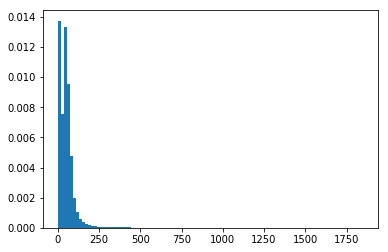

In [10]:
plt.hist((im1.reshape(512*512)+1), 100,normed=1)  # arguments are passed to np.histogram
plt.show()

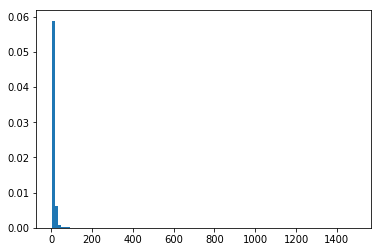

In [11]:
plt.hist((im2.reshape(512*512)+1), 100,normed=1)  # arguments are passed to np.histogram
plt.show()

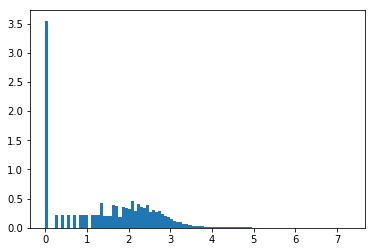

In [12]:
plt.hist(np.log(im2.reshape(512*512)+1), 100,normed=1)  # arguments are passed to np.histogram
plt.show()

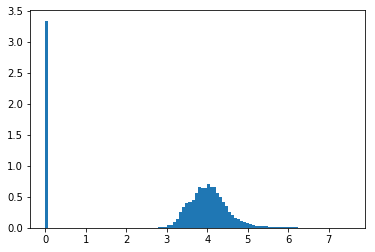

In [13]:
plt.hist(np.log(im1.reshape(512*512)+1), 100,normed=1)  # arguments are passed to np.histogram
plt.show()

In [16]:
np.corrcoef(im1.reshape(512*512),im2.reshape(512*512))

array([[1.        , 0.37211452],
       [0.37211452, 1.        ]])

In [17]:
np.corrcoef(im1.reshape(512*512),np.log(im2.reshape(512*512)+1))

array([[1.        , 0.53348432],
       [0.53348432, 1.        ]])

In [18]:
np.corrcoef(np.log(im1.reshape(512*512)+1),np.log(im2.reshape(512*512)+1))

array([[1.        , 0.75252582],
       [0.75252582, 1.        ]])

In [22]:
print(np.log(im1+1).max(),np.log(im2+1).max())

7.5205054 7.309045


In [14]:
x=np.log(im1.reshape(512*512)+1)/10
y=np.log(im2.reshape(512*512)+1)/10

In [15]:
np.mean(np.power(x-y,2))

0.038932722

In [16]:
x_normed=x/np.linalg.norm(x)
y_normed=y/np.linalg.norm(y)

In [22]:
x_scaled=x-np.mean(x)
y_scaled=y-np.mean(y)
x_scaled/=np.linalg.norm(x_scaled)
y_scaled/=np.linalg.norm(y_scaled)


In [21]:
np.sum(np.multiply(x_normed,y_normed))

0.914514

In [23]:
np.sum(np.multiply(x_scaled,y_scaled))

0.7525289

In [24]:
np.corrcoef(x,y)

array([[1.        , 0.75252582],
       [0.75252582, 1.        ]])

In [25]:
np.corrcoef(x_normed,y_normed)

array([[1.        , 0.75252582],
       [0.75252582, 1.        ]])

In [26]:
np.corrcoef(x_scaled,y_scaled)

array([[1.        , 0.75252581],
       [0.75252581, 1.        ]])